In [22]:
import os
import time
import logging
import pandas as pd
from sqlalchemy import create_engine


In [23]:
import logging, os

log_path = os.path.join(data_dir, "data_ingestion.log")

# Reset handlers (important in Jupyter to avoid duplicate configs)
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filename=log_path,
    filemode="a"
)

logging.info("Log file test ✅")
logging.shutdown()   # flush to disk

print("Log file created at:", log_path)
print("Exists:", os.path.isfile(log_path))


Log file created at: C:\Users\tanis\Downloads\VENDOR DATA\data_ingestion.log
Exists: True


In [24]:

# Define your data folder
data_dir = r"C:\Users\tanis\Downloads\VENDOR DATA"


In [25]:
def ingest_df(df, table_name, store):
    """Store a DataFrame in a dictionary keyed by table_name."""
    store[table_name] = df

In [26]:
def load_raw_Data():
    """Load all CSVs from folder into a dictionary of DataFrames."""
    start = time.time()
    dataframes = {}   # dictionary to hold all DataFrames
    
    for file in os.listdir(data_dir):
        if file.endswith('.csv'):
            file_path = os.path.join(data_dir, file)
            df = pd.read_csv(file_path)
            logging.info(f"Loading {file} into DataFrame...")
            ingest_df(df, file[:-4], dataframes)
            logging.info(f"{file} loaded successfully ✅")
    
    end = time.time()
    total_time = (end - start) / 60
    logging.info(f"Total time taken: {total_time:.2f} min")
    
    return dataframes

In [27]:
# Run the function
dfs = load_raw_Data()

In [28]:
# Example: access one of the DataFrames
print(dfs.keys())   # shows all table names (derived from filenames)

# Show all table names
print("Available tables:", dfs.keys())

# Loop through each DataFrame and display the first 5 rows
for table_name, df in dfs.items():
    print(f"\n--- {table_name} ---")
    print(df.head())


dict_keys(['begin_inventory', 'end_inventory', 'purchases', 'purchase_prices', 'sales', 'vendor_invoice'])
Available tables: dict_keys(['begin_inventory', 'end_inventory', 'purchases', 'purchase_prices', 'sales', 'vendor_invoice'])

--- begin_inventory ---
         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price   startDate  
0  750mL       8  12.99  2024-01-01  
1  750mL       7  10.99  2024-01-01  
2  750mL       6  36.99  2024-01-01  
3  750mL       3  38.99  2024-01-01  
4  750mL       6  34.99  2024-01-01  

--- end_inventory ---
     

EDA 
understand the dataset to explore how the data is present in the dataset and if there is need of creating some aggrgate table that can be help with:
vendor selection for profitablity
product picking optimization

In [35]:
# Show row and column counts for each table
for table_name, df in dfs.items():
    rows, cols = df.shape
    print(f"{table_name}: {rows} rows, {cols} columns")


begin_inventory: 206529 rows, 9 columns
end_inventory: 224489 rows, 9 columns
purchases: 2372474 rows, 16 columns
purchase_prices: 12261 rows, 9 columns
sales: 12825363 rows, 14 columns
vendor_invoice: 5543 rows, 10 columns


In [ ]:
# Show head for each table
for table_name, df in dfs.items():
    rows, cols = df.
    print(f"{table_name}: {rows} rows, {cols} columns")


In [36]:
# Loop through each DataFrame and display the first 5 rows
for table_name, df in dfs.items():
    print(f"\n=== {table_name} ===")
    print(df.head())



=== begin_inventory ===
         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price   startDate  
0  750mL       8  12.99  2024-01-01  
1  750mL       7  10.99  2024-01-01  
2  750mL       6  36.99  2024-01-01  
3  750mL       3  38.99  2024-01-01  
4  750mL       6  34.99  2024-01-01  

=== end_inventory ===
         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequi

In [42]:
# Select all vendors with VendorNumber = 4466 from purchases table
vendors_4466 = dfs['purchases'][dfs['purchases']['VendorNumber'] == 4466]

print(vendors_4466)
print(f"Rows: {vendors_4466.shape[0]}, Columns: {vendors_4466.shape[1]}")



                 InventoryId  Store  Brand                   Description  \
1           30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide   
2          34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced   
3        1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide   
8091       38_GOULCREST_5215     38   5215  TGI Fridays Long Island Iced   
8092     59_CLAETHORPES_5215     59   5215  TGI Fridays Long Island Iced   
...                      ...    ...    ...                           ...   
2314214     81_PEMBROKE_5215     81   5215  TGI Fridays Long Island Iced   
2314215   62_KILMARNOCK_5255     62   5255  TGI Fridays Ultimte Mudslide   
2314216    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced   
2314217     6_GOULCREST_5215      6   5215  TGI Fridays Long Island Iced   
2314218    35_HALIVAARA_5255     35   5255  TGI Fridays Ultimte Mudslide   

          Size  VendorNumber                   VendorName  PONumber  \
1        1.75L  

In [43]:
vendors_4466 = dfs['purchase_prices'][dfs['purchase_prices']['VendorNumber'] == 4466]

print(vendors_4466)
print(f"Rows: {vendors_4466.shape[0]}, Columns: {vendors_4466.shape[1]}")


      Brand                   Description  Price    Size Volume  \
1197   5215  TGI Fridays Long Island Iced  12.99  1750mL   1750   
1212   5255  TGI Fridays Ultimte Mudslide  12.99  1750mL   1750   
9962   3140      TGI Fridays Orange Dream  14.99  1750mL   1750   

      Classification  PurchasePrice  VendorNumber                   VendorName  
1197               1           9.41          4466  AMERICAN VINTAGE BEVERAGE    
1212               1           9.35          4466  AMERICAN VINTAGE BEVERAGE    
9962               1          11.19          4466  AMERICAN VINTAGE BEVERAGE    
Rows: 3, Columns: 9


In [44]:
vendors_4466 = dfs['vendor_invoice'][dfs['vendor_invoice']['VendorNumber'] == 4466]

print(vendors_4466)
print(f"Rows: {vendors_4466.shape[0]}, Columns: {vendors_4466.shape[1]}")


      VendorNumber                   VendorName InvoiceDate  PONumber  \
1             4466  AMERICAN VINTAGE BEVERAGE    2024-01-07      8137   
90            4466  AMERICAN VINTAGE BEVERAGE    2024-01-19      8207   
189           4466  AMERICAN VINTAGE BEVERAGE    2024-01-18      8307   
284           4466  AMERICAN VINTAGE BEVERAGE    2024-01-27      8469   
380           4466  AMERICAN VINTAGE BEVERAGE    2024-02-04      8532   
486           4466  AMERICAN VINTAGE BEVERAGE    2024-02-09      8604   
586           4466  AMERICAN VINTAGE BEVERAGE    2024-02-17      8793   
691           4466  AMERICAN VINTAGE BEVERAGE    2024-03-01      8892   
798           4466  AMERICAN VINTAGE BEVERAGE    2024-03-07      8995   
899           4466  AMERICAN VINTAGE BEVERAGE    2024-03-12      9033   
995           4466  AMERICAN VINTAGE BEVERAGE    2024-03-16      9180   
1096          4466  AMERICAN VINTAGE BEVERAGE    2024-03-23      9244   
1199          4466  AMERICAN VINTAGE BEVERAGE    20

In [50]:
vendors_4466 = dfs['sales'][dfs['sales']['VendorNo'] == 4466]

print(vendors_4466)
print(f"Rows: {vendors_4466.shape[0]}, Columns: {vendors_4466.shape[1]}")


                  InventoryId  Store  Brand                   Description  \
13370     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced   
13371     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced   
13372     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced   
13373     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced   
13374     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced   
...                       ...    ...    ...                           ...   
12819662     9_BLACKPOOL_5215      9   5215  TGI Fridays Long Island Iced   
12819801     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide   
12819802     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide   
12819803     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide   
12819804     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide   

           Size  SalesQuantity  SalesDollars  SalesPrice   SalesDate  Volum

In [52]:
print(dfs['purchase_prices'])


       Brand                   Description  Price    Size Volume  \
0         58   Gekkeikan Black & Gold Sake  12.99   750mL    750   
1         62      Herradura Silver Tequila  36.99   750mL    750   
2         63    Herradura Reposado Tequila  38.99   750mL    750   
3         72          No. 3 London Dry Gin  34.99   750mL    750   
4         75     Three Olives Tomato Vodka  14.99   750mL    750   
...      ...                           ...    ...     ...    ...   
12256  44917     Ferreira 10-Yr Tawny Port  24.99   750mL    750   
12257  44944     Sanford Santa Rita Pnt Nr  22.99   750mL    750   
12258  45016  Neal One Lane Bridg Cab Svgn  93.99   750mL    750   
12259  46011       Folonari Pnt Nr Venezie  12.99  1500ml   1500   
12260  46964     Calera Viognier Mt Harlan  35.99   750mL    750   

       Classification  PurchasePrice  VendorNumber  \
0                   1           9.28          8320   
1                   1          28.67          1128   
2                   1

In [60]:
# Group purchases by Brand and PurchasePrice, summing Quantity and Dollars
grouped = dfs['purchases'].groupby(['Brand', 'PurchasePrice'])[['Quantity', 'Dollars']].sum()

print(grouped)


                     Quantity   Dollars
Brand PurchasePrice                    
58    9.28               3550  32944.00
60    7.40               1633  12084.20
61    10.60               312   3307.20
62    28.67              3200  91744.00
63    30.46              2855  86963.30
...                       ...       ...
90089 77.92                32   2493.44
90090 448.27                6   2689.62
90604 78.42               118   9253.56
90609 17.00               321   5457.00
90631 12.74              1938  24690.12

[10664 rows x 2 columns]


In [59]:
# Group sales by Brand  summing saledollars, saleprice, saleqty
grouped = dfs['sales'].groupby(['Brand'])[['SalesDollars', 'SalesPrice', 'SalesQuantity']].sum()
print(grouped)


       Brand  SalesDollars  SalesPrice  SalesQuantity
0         58      43341.54    28145.64           3446
1         60      18716.25    10720.79           1775
2         61       4364.88      363.74            312
3         62     119863.75    90154.51           3125
4         63     112249.22    88553.10           2778
...      ...           ...         ...            ...
11232  90089      19078.41     5759.52            159
11233  90090       9749.85     4549.93             15
11234  90604       9119.24     2639.78             76
11235  90609       2074.17     1774.29             83
11236  90631      31504.41    19502.73           1659

[11237 rows x 4 columns]


notedown observations

In [63]:
#finding the freight_summary

freight_summary = dfs['vendor_invoice'].groupby('VendorNumber', as_index=False).agg({
    'Freight': 'sum'
}).rename(columns={'Freight': 'FreightCost'})

print(freight_summary)



     VendorNumber  FreightCost
0               2        27.08
1              54         0.48
2              60       367.52
3             105        62.39
4             200         6.19
..            ...          ...
121         98450       856.02
122         99166       130.09
123        172662       178.34
124        173357       202.50
125        201359         0.09

[126 rows x 2 columns]


In [157]:
# Merge purchases with purchase_prices on Brand
merged = pd.merge(
    dfs['purchases'],
    dfs['purchase_prices'][['Brand', 'Volume', 'Price']],
    on='Brand',
    how='left'
)

# Apply condition: only keep rows where PurchasePrice > 0
merged = merged[merged['PurchasePrice'] > 0]

# Group by VendorNumber, VendorName, Brand, Description
grouped = merged.groupby(
    ['VendorNumber', 'VendorName', 'Brand', 'Description'], 
    as_index=False
).agg({
    'PurchasePrice': 'first',        # keep purchase price per brand
    'Quantity': 'sum',               # total purchase qty
    'Dollars': 'sum',                # total purchase dollars
    'Volume': 'first',               # from purchase_prices table
    'Price': 'first'                 # actual price from purchase_prices
})

# Rename columns for clarity
grouped = grouped.rename(columns={
    'Quantity': 'TotalPurchaseQty',
    'Dollars': 'TotalPurchaseDollars',
    'Price': 'ActualPrice'
})

# Order by TotalPurchaseDollars
grouped = grouped.sort_values(by='TotalPurchaseDollars', ascending=False)

print(grouped)


       VendorNumber                   VendorName  Brand  \
636            1128  BROWN-FORMAN CORP             1233   
3162           4425        MARTIGNETTI COMPANIES   3405   
10067         17035  PERNOD RICARD USA             8068   
2975           3960  DIAGEO NORTH AMERICA INC      4261   
2907           3960  DIAGEO NORTH AMERICA INC      3545   
...             ...                          ...    ...   
8303           9815  WINE GROUP INC                8527   
5830           8004  SAZERAC CO INC                5683   
2660           3924  HEAVEN HILL DISTILLERIES      9123   
3026           3960  DIAGEO NORTH AMERICA INC      6127   
5576           7245  PROXIMO SPIRITS INC.          3065   

                       Description  PurchasePrice  TotalPurchaseQty  \
636        Jack Daniels No 7 Black          26.27            145080   
3162         Tito's Handmade Vodka          23.19            164038   
10067             Absolut 80 Proof          18.24            187407   
2975   

In [158]:
sales_summary = dfs['sales'].groupby(['VendorNo', 'Brand'], as_index=False).agg({
    'SalesDollars': 'sum',
    'SalesPrice': 'sum',
    'SalesQuantity': 'sum',
    'ExciseTax': 'sum'
})

# Rename columns for clarity
sales_summary = sales_summary.rename(columns={
    'SalesDollars': 'TotalSalesDollars',
    'SalesPrice': 'TotalSalesPrice',
    'SalesQuantity': 'TotalSalesQty',
    'ExciseTax': 'TotalExciseTax'
})

# Order by TotalSalesDollars descending
sales_summary = sales_summary.sort_values(by='TotalSalesDollars', ascending=False)

print(sales_summary)


       VendorNo  Brand  TotalSalesDollars  TotalSalesPrice  TotalSalesQty  \
671        1128   1233         5101919.51        672819.31         142049   
3291       4425   3405         4819073.49        561512.37         160247   
10609     17035   8068         4538120.60        461140.15         187140   
3092       3960   4261         4475972.88        420050.01         200412   
3023       3960   3545         4223107.62        545778.28         135838   
...         ...    ...                ...              ...            ...   
2768       3924   9123               1.98             0.99              2   
2133       3252   3933               1.98             0.99              2   
9080      10050   3623               1.98             1.98              2   
7653       9206   2773               0.99             0.99              1   
6127       8004   5287               0.98             0.98              2   

       TotalExciseTax  
671         260999.20  
3291        294438.66  
106

In [159]:
# Merge purchase summary with freight summary
final_table = pd.merge(
    grouped,
    freight_summary,
    on='VendorNumber',
    how='left'
)

# Merge with sales summary
final_table = pd.merge(
    final_table,
    sales_summary,
    left_on=['VendorNumber','Brand'],
    right_on=['VendorNo','Brand'],
    how='left'
)

# Drop duplicate VendorNo column from sales_summary
final_table = final_table.drop(columns=['VendorNo'])

# Order by TotalSalesDollars
final_table = final_table.sort_values(by='TotalSalesDollars', ascending=False)

print(final_table.head())
# Show total rows and columns at the end
rows, cols = final_table.shape
print(f"\nTotal rows: {rows}, Total columns: {cols}")

   VendorNumber                   VendorName  Brand              Description  \
0          1128  BROWN-FORMAN CORP             1233  Jack Daniels No 7 Black   
1          4425        MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035  PERNOD RICARD USA             8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC      4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC      3545          Ketel One Vodka   

   PurchasePrice  TotalPurchaseQty  TotalPurchaseDollars Volume  ActualPrice  \
0          26.27            145080            3811251.60   1750        36.99   
1          23.19            164038            3804041.22   1750        28.99   
2          18.24            187407            3418303.68   1750        24.99   
3          16.17            201682            3261197.94   1750        22.99   
4          21.89            138109            3023206.01   1750        29.99   

   FreightCost  TotalSalesDollars  Tot

markdown 

In [164]:
from sqlalchemy import create_engine , inspect

start =time.time()
engine = create_engine('sqlite:///my_database1.db')

final_table.to_sql('final_table', con=engine, if_exists='append', index=False)
logging.info(f" final_table saved successfully ✅")
    

end = time.time()
total_time = (end - start) / 60
logging.info(f"Total time taken: {total_time:.2f} min")
    


In [165]:
# Save final_table as CSV in your current folder
final_table.to_csv("final_table.csv", index=False)

In [166]:
final = pd.read_csv("final_table.csv")

In [167]:
final.dtypes

VendorNumber              int64
VendorName               object
Brand                     int64
Description              object
PurchasePrice           float64
TotalPurchaseQty          int64
TotalPurchaseDollars    float64
Volume                  float64
ActualPrice             float64
FreightCost             float64
TotalSalesDollars       float64
TotalSalesPrice         float64
TotalSalesQty           float64
TotalExciseTax          float64
dtype: object

In [168]:
final.isnull().sum()

VendorNumber              0
VendorName                0
Brand                     0
Description               0
PurchasePrice             0
TotalPurchaseQty          0
TotalPurchaseDollars      0
Volume                    0
ActualPrice               0
FreightCost               0
TotalSalesDollars       178
TotalSalesPrice         178
TotalSalesQty           178
TotalExciseTax          178
dtype: int64

In [169]:
final.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,TotalPurchaseQty,TotalPurchaseDollars,Volume,ActualPrice,FreightCost,TotalSalesDollars,TotalSalesPrice,TotalSalesQty,TotalExciseTax
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,145080,3811251.60,1750.0,36.99,68601.68,5101919.51,672819.31,142049.0,260999.20
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,164038,3804041.22,1750.0,28.99,144929.24,4819073.49,561512.37,160247.0,294438.66
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,187407,3418303.68,1750.0,24.99,123780.22,4538120.60,461140.15,187140.0,343854.07
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,201682,3261197.94,1750.0,22.99,257032.07,4475972.88,420050.01,200412.0,368242.80
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,138109,3023206.01,1750.0,29.99,257032.07,4223107.62,545778.28,135838.0,249587.83


In [170]:
final['VendorName'] = final['VendorName'].str.strip()

In [171]:
final.fillna(0, inplace =True)

In [172]:
final['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'MOET HENNESSY USA INC',
       'PROXIMO SPIRITS INC.', 'STOLI GROUP,(USA) LLC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC',
       'PALM BAY INTERNATIONAL INC', 'SAZERAC NORTH AMERICA INC.',
       'M S WALKER INC', 'E & J GALLO WINERY', 'REMY COINTREAU USA INC',
       'DISARONNO INTERNATIONAL LLC', 'SIDNEY FRANK IMPORTING CO',
       'HEAVEN HILL DISTILLERIES', 'WILLIAM GRANT & SONS INC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'TRINCHERO FAMILY ESTATES', 'SOUTHERN WINE & SPIRITS NE',
       'STE MICHELLE WINE ESTATES', 'WINE GROUP INC', 'PERFECTA WINES',
       'MHW LTD', 'TREASURY WINE ESTATES', 'DIAGEO CHATEAU ESTATE WINES',
       'PINE STATE TRADING CO', 'LUXCO INC', 'SHAW ROSS INT L IMP LTD',
       'PHILLIPS PRO

In [173]:
final.isnull().sum()

VendorNumber            0
VendorName              0
Brand                   0
Description             0
PurchasePrice           0
TotalPurchaseQty        0
TotalPurchaseDollars    0
Volume                  0
ActualPrice             0
FreightCost             0
TotalSalesDollars       0
TotalSalesPrice         0
TotalSalesQty           0
TotalExciseTax          0
dtype: int64

In [463]:
final.dtypes

VendorNumber              int64
VendorName               object
Brand                     int64
Description              object
PurchasePrice           float64
TotalPurchaseQty          int64
TotalPurchaseDollars    float64
Volume                  float64
ActualPrice             float64
FreightCost             float64
TotalSalesDollars       float64
TotalSalesPrice         float64
TotalSalesQty           float64
TotalExciseTax          float64
grossProfit             float64
ProfitMargin            float64
StockTurnOver           float64
SalesPurhaseRatio       float64
dtype: object

In [174]:
final['grossProfit'] =  final['TotalSalesDollars']- final['TotalPurchaseDollars'] 

In [175]:
final['grossProfit'].min()

np.float64(-52002.780000000006)

In [461]:
final['grossProfit']

0        1290667.91
1        1015032.27
2        1119816.92
3        1214774.94
4        1199901.61
            ...    
10687        -10.13
10688         -9.72
10689         -9.44
10690         -6.84
10691         -5.22
Name: grossProfit, Length: 10692, dtype: float64

In [176]:
final['ProfitMargin'] = final['grossProfit'] / final['TotalSalesDollars']

In [462]:
final['ProfitMargin']

0        0.252977
1        0.210628
2        0.246758
3        0.271399
4        0.284128
           ...   
10687        -inf
10688        -inf
10689        -inf
10690        -inf
10691        -inf
Name: ProfitMargin, Length: 10692, dtype: float64

In [177]:
final['StockTurnOver'] = final['TotalSalesQty'] / final['TotalPurchaseQty']

In [178]:
final['SalesPurhaseRatio'] =final['TotalSalesDollars'] / final['TotalPurchaseDollars']

In [179]:
final.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,TotalPurchaseQty,TotalPurchaseDollars,Volume,ActualPrice,FreightCost,TotalSalesDollars,TotalSalesPrice,TotalSalesQty,TotalExciseTax,grossProfit,ProfitMargin,StockTurnOver,SalesPurhaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,145080,3811251.60,1750.0,36.99,68601.68,5101919.51,672819.31,142049.0,260999.20,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,164038,3804041.22,1750.0,28.99,144929.24,4819073.49,561512.37,160247.0,294438.66,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,187407,3418303.68,1750.0,24.99,123780.22,4538120.60,461140.15,187140.0,343854.07,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,201682,3261197.94,1750.0,22.99,257032.07,4475972.88,420050.01,200412.0,368242.80,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,138109,3023206.01,1750.0,29.99,257032.07,4223107.62,545778.28,135838.0,249587.83,1199901.61,0.284128,0.983556,1.396897


In [180]:
import os
from sqlalchemy import create_engine

# Build full path to Downloads
db_path = os.path.join(os.path.expanduser("~"), "Downloads", "my_database.db")

# Create engine with proper SQLite URL
engine = create_engine(f"sqlite:///{db_path}")

# Save DataFrame
final.to_sql("final_table", con=engine, if_exists="replace", index=False)


10692

In [181]:
final.to_csv('finaltable.csv')

In [182]:
df = pd.read_csv("finaltable.csv")

In [183]:
df.head()

,Unnamed: 0,VendorNumber,VendorName,Brand,Description,PurchasePrice,TotalPurchaseQty,TotalPurchaseDollars,Volume,ActualPrice,FreightCost,TotalSalesDollars,TotalSalesPrice,TotalSalesQty,TotalExciseTax,grossProfit,ProfitMargin,StockTurnOver,SalesPurhaseRatio
0,0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,145080,3811251.60,1750.0,36.99,68601.68,5101919.51,672819.31,142049.0,260999.20,1290667.91,0.252977,0.979108,1.338647
1,1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,164038,3804041.22,1750.0,28.99,144929.24,4819073.49,561512.37,160247.0,294438.66,1015032.27,0.210628,0.976890,1.266830
2,2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,187407,3418303.68,1750.0,24.99,123780.22,4538120.60,461140.15,187140.0,343854.07,1119816.92,0.246758,0.998575,1.327594
3,3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,201682,3261197.94,1750.0,22.99,257032.07,4475972.88,420050.01,200412.0,368242.80,1214774.94,0.271399,0.993703,1.372493
4,4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,138109,3023206.01,1750.0,29.99,257032.07,4223107.62,545778.28,135838.0,249587.83,1199901.61,0.284128,0.983556,1.396897


start analysis

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats 
import math

eda


In [185]:
#summary statistics 

df.describe().T
# .T for transpose

C:\Users\tanis\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10692.0,5.345500e+03,3086.658873,0.00,2672.750000,5345.500000,8018.250000,1.069100e+04
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseQty,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
FreightCost,10692.0,6.143376e+04,60938.458032,0.09,14069.870000,50293.620000,79528.990000,2.570321e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


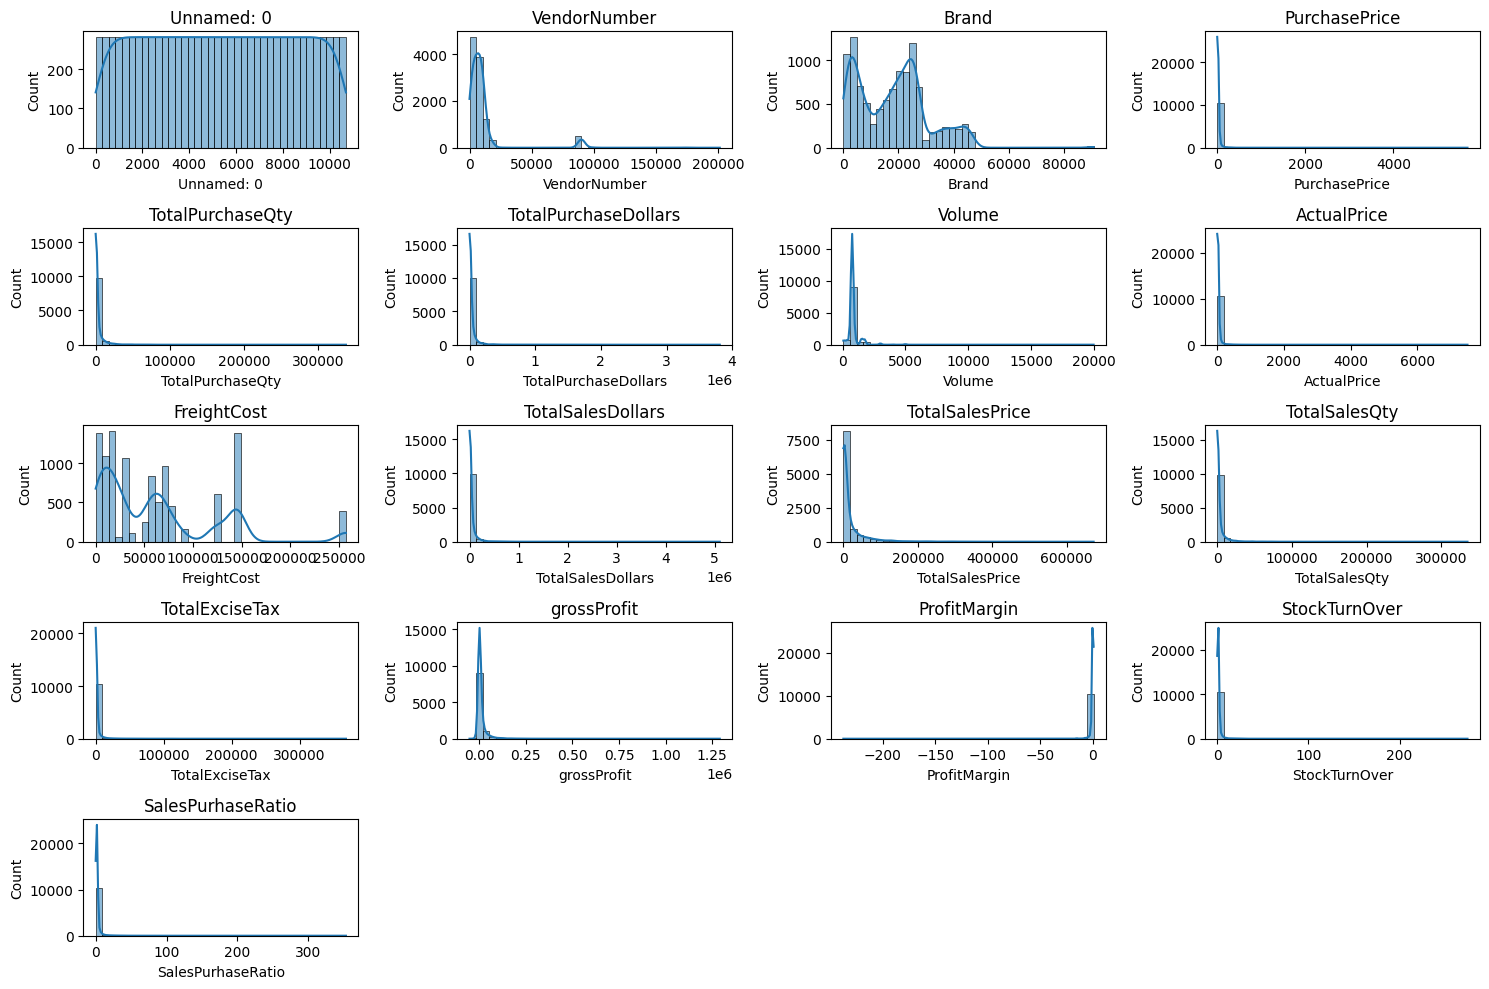

In [186]:
#distribution plots of numrical cols
numrical_cols = df.select_dtypes(include=np.number).columns

n = len(numrical_cols)
rows = math.ceil(n/4)

plt.figure(figsize=(15,10))
for i, col in enumerate(numrical_cols):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde=True, bins=38)
    plt.title(col)
plt.tight_layout()
plt.show()


points

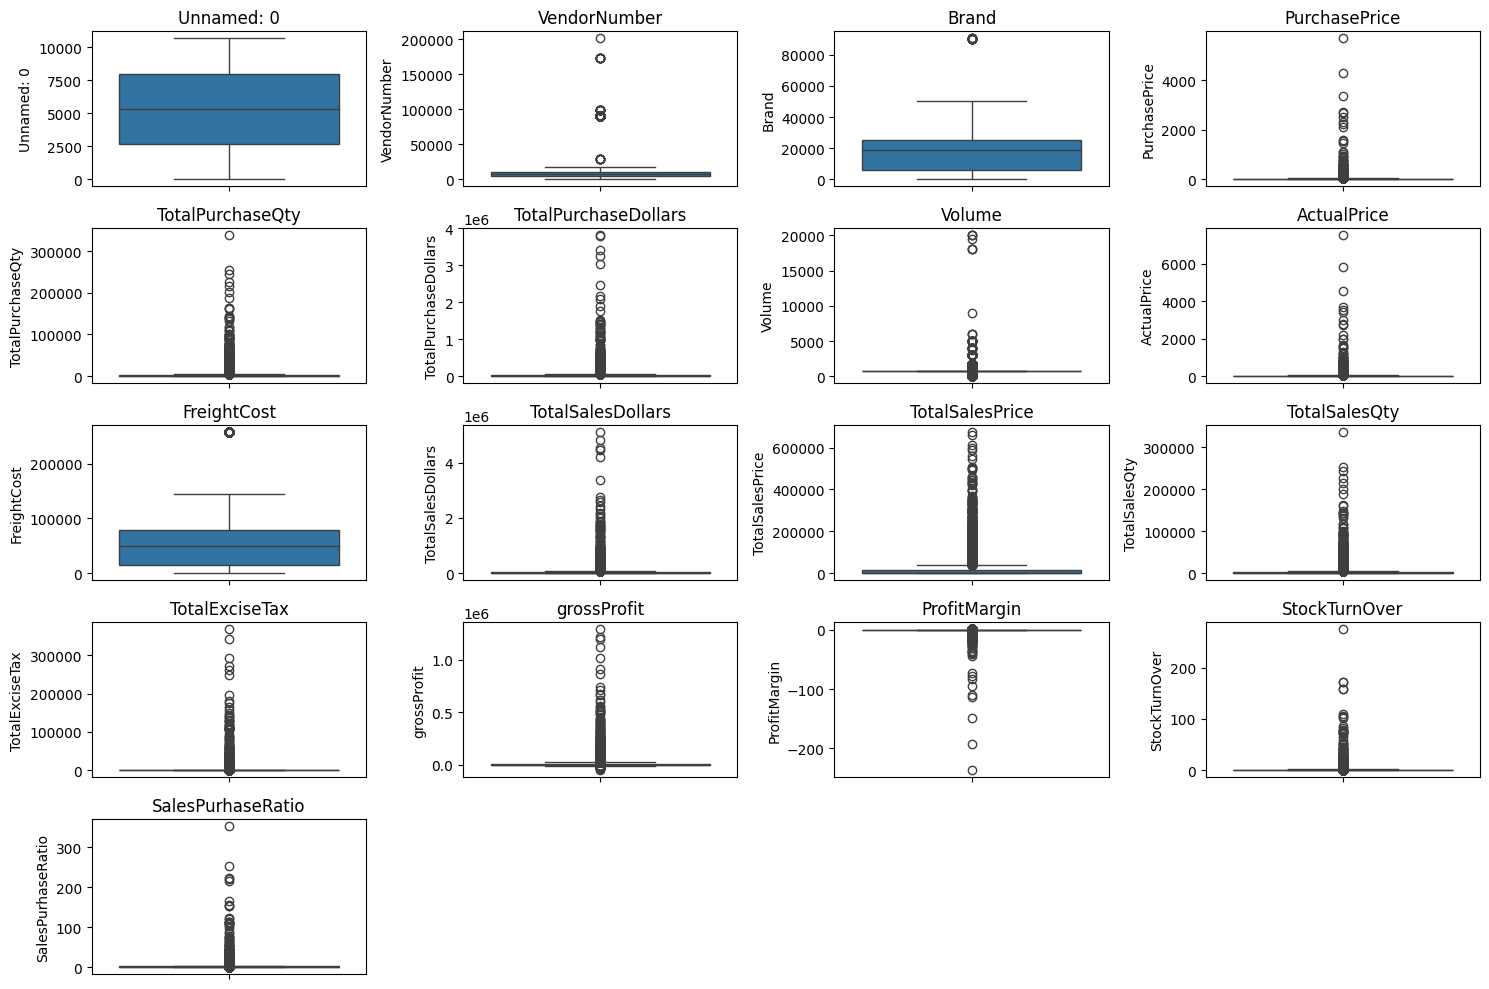

In [187]:
#distribution plots of numrical cols
numrical_cols = df.select_dtypes(include=np.number).columns

n = len(numrical_cols)
rows = math.ceil(n/4)

plt.figure(figsize=(15,10))
for i, col in enumerate(numrical_cols):
    plt.subplot(rows, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [188]:
df = df[
    (df["grossProfit"] > 0) &
    (df["ProfitMargin"] > 0) &
    (df["TotalSalesQty"] > 0)
]
print(df.shape)
print(df.head())


(8564, 19)
   Unnamed: 0  VendorNumber                VendorName  Brand  \
0           0          1128         BROWN-FORMAN CORP   1233   
1           1          4425     MARTIGNETTI COMPANIES   3405   
2           2         17035         PERNOD RICARD USA   8068   
3           3          3960  DIAGEO NORTH AMERICA INC   4261   
4           4          3960  DIAGEO NORTH AMERICA INC   3545   

               Description  PurchasePrice  TotalPurchaseQty  \
0  Jack Daniels No 7 Black          26.27            145080   
1    Tito's Handmade Vodka          23.19            164038   
2         Absolut 80 Proof          18.24            187407   
3   Capt Morgan Spiced Rum          16.17            201682   
4          Ketel One Vodka          21.89            138109   

   TotalPurchaseDollars  Volume  ActualPrice  FreightCost  TotalSalesDollars  \
0            3811251.60  1750.0        36.99     68601.68         5101919.51   
1            3804041.22  1750.0        28.99    144929.24        

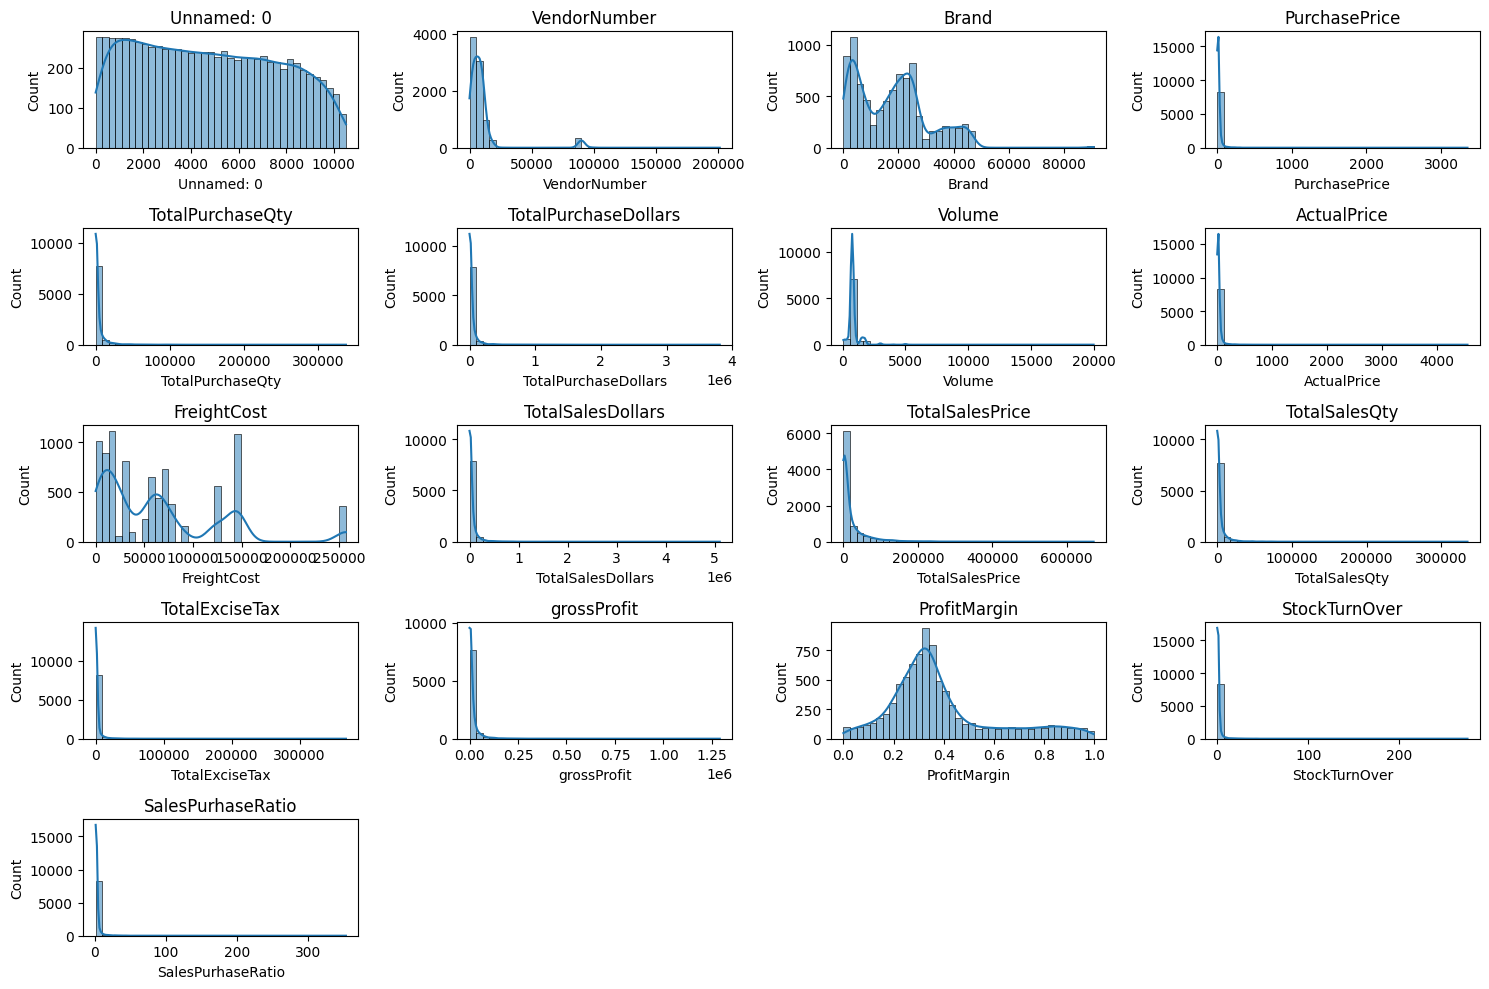

In [189]:
#distribution plots of numrical cols
numrical_cols = df.select_dtypes(include=np.number).columns

n = len(numrical_cols)
rows = math.ceil(n/4)

plt.figure(figsize=(15,10))
for i, col in enumerate(numrical_cols):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde=True, bins=38)
    plt.title(col)
plt.tight_layout()
plt.show()


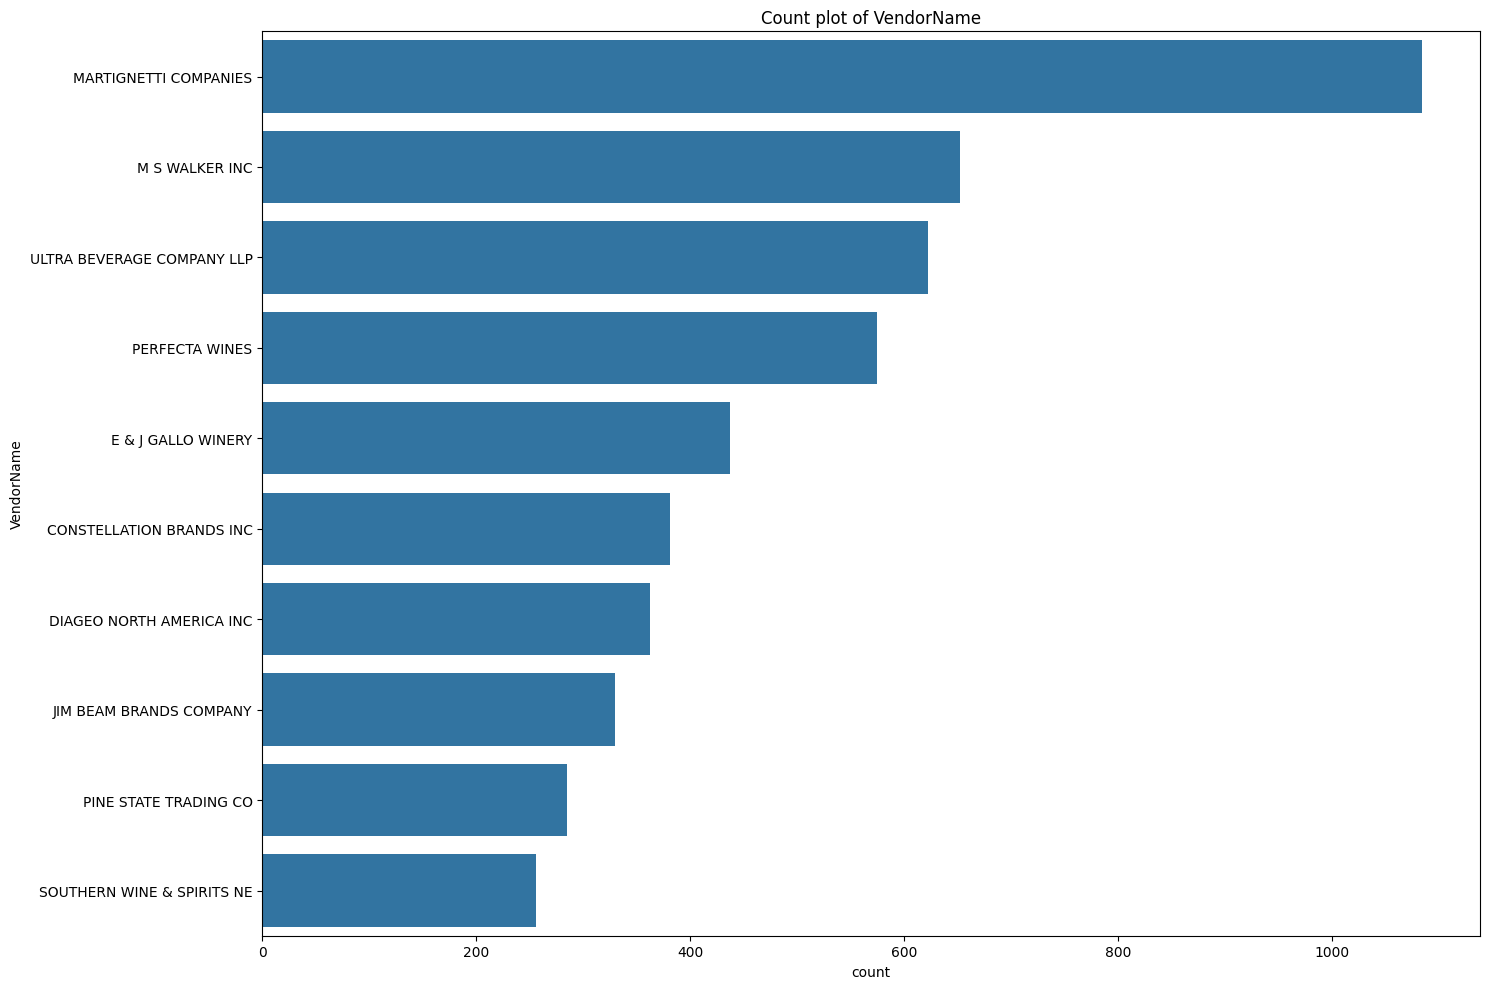

In [190]:
#count plot for categorical columns
cate_cols = ["VendorName"]

plt.figure(figsize=(15,10))
for i, col in enumerate(cate_cols):
    plt.subplot(1, len(cate_cols), i+1)   # dynamic subplot grid
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()


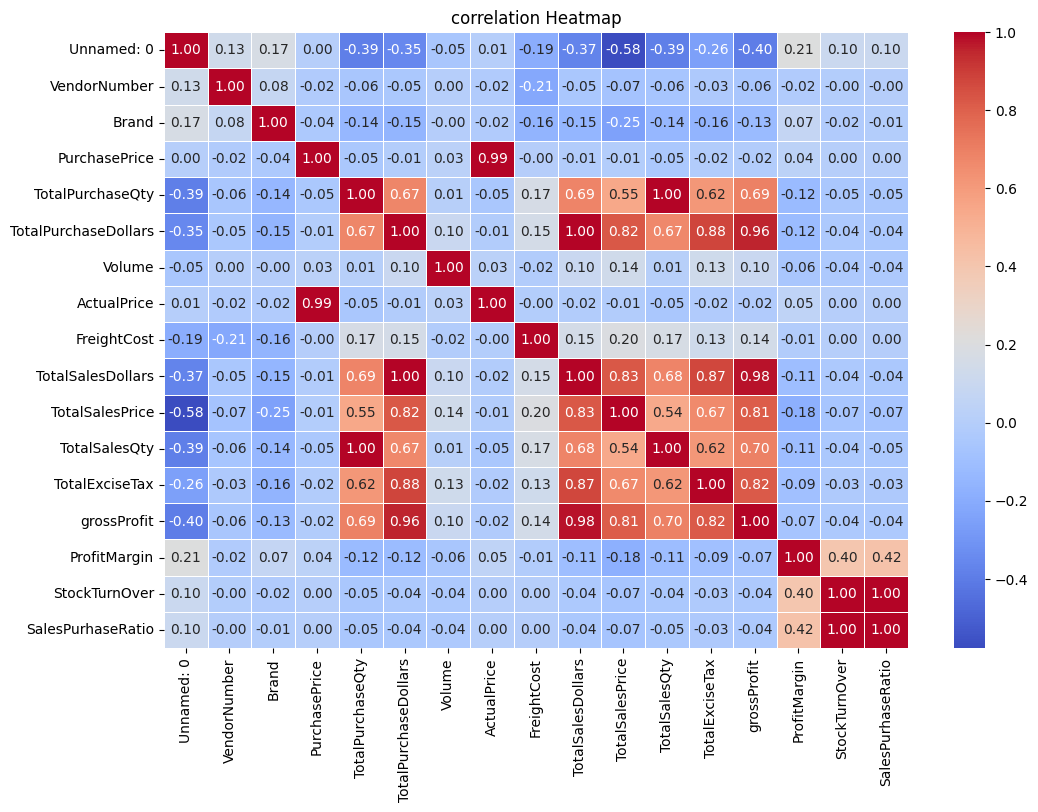

In [191]:
# reltion between variable

plt.figure(figsize=(12,8))
correlation_matrix = df[numrical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt= ".2f", cmap ="coolwarm", linewidth = 0.5)
plt.title("correlation Heatmap")
plt.show()

insights

In [192]:
#brand sale lower but hight profit
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' :'sum',
    'ProfitMargin' :'mean'}).reset_index()

In [193]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [194]:
low_sales_threshold

np.float64(560.299)

In [195]:
high_margin_threshold

np.float64(0.6497017552750112)

In [198]:
#filter the brand with low sale but high margin
target_brand = brand_performance[(brand_performance['TotalSalesDollars']<= low_sales_threshold)&
                (brand_performance['ProfitMargin'] >= high_margin_threshold) ]
print("brand with low sale and high margin")
display(target_brand.sort_values('TotalSalesDollars'))

brand with low sale and high margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,0.664665
2369,Debauchery Pnt Nr,11.58,0.659758
2070,Concannon Glen Ellen Wh Zin,15.95,0.834483
2188,Crown Royal Apple,27.86,0.898062
6237,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,0.767473
2271,Dad's Hat Rye Whiskey,538.89,0.818516
57,A Bichot Clos Marechaudes,539.94,0.677409
6245,Sbragia Home Ranch Merlot,549.75,0.664447


In [211]:
#filtering brand performance for better visualization
brand_performance  = brand_performance[brand_performance['TotalSalesDollars'] <50000] 

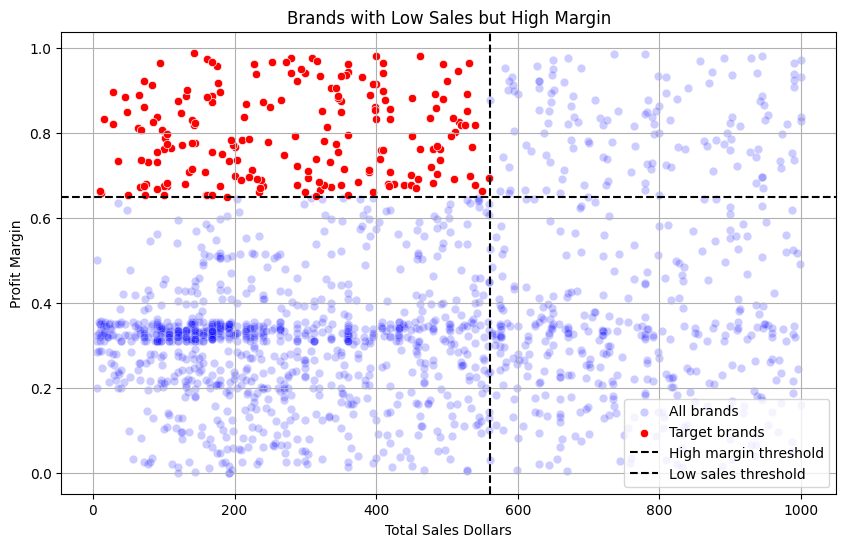

In [212]:
plt.figure(figsize=(10,6))
# Scatter plots
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars', y='ProfitMargin',
    color='blue', label="All brands", alpha=0.2
)
sns.scatterplot(
    data=target_brand,
    x='TotalSalesDollars', y='ProfitMargin',
    color='red', label="Target brands"
)

# Threshold lines
plt.axhline(y=high_margin_threshold, linestyle="--", color="black", label="High margin threshold")
plt.axvline(x=low_sales_threshold, linestyle="--", color="black", label="Low sales threshold")

# Labels and formatting
plt.xlabel("Total Sales Dollars")
plt.ylabel("Profit Margin")
plt.title("Brands with Low Sales but High Margin")
plt.grid(True)
plt.legend()
plt.show()


ques

In [214]:
# top vendor and sales by performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [305]:
def formate_dollar(value):
    if value is None or pd.isna(value):   # handle NaN or None
        return ""
    elif value > 100000.00:
        return f"{value / 1_000_000:.2f}1M"
    elif value == 1_000_000:
        return f"{value / 1_000_000:.2f}1M"
    elif value > 1_000.00:
        return f"{value / 1_000:.2f}k"
    else:
        return f"{value:.0f}"   # return as string


In [300]:
top_vendors

,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars,purchase_contribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.36999999999995,704.53,0.000001
1,ALISA CARR BEVERAGES,,,,0.000084
2,ALTAMAR BRANDS LLC,,,,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,,0.000003
4,AMERICAN VINTAGE BEVERAGE,,,,0.000340


In [216]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [221]:
top_brands.apply(lambda x : formate_dollar(x))

Description
Jack Daniels No 7 Black    7.96m
Tito's Handmade Vodka      7.40m
Grey Goose Vodka           7.21m
Capt Morgan Spiced Rum     6.36m
Absolut 80 Proof           6.24m
Jameson Irish Whiskey      5.72m
Ketel One Vodka            5.07m
Baileys Irish Cream        4.15m
Kahlua                     3.60m
Tanqueray                  3.46m
Name: TotalSalesDollars, dtype: object

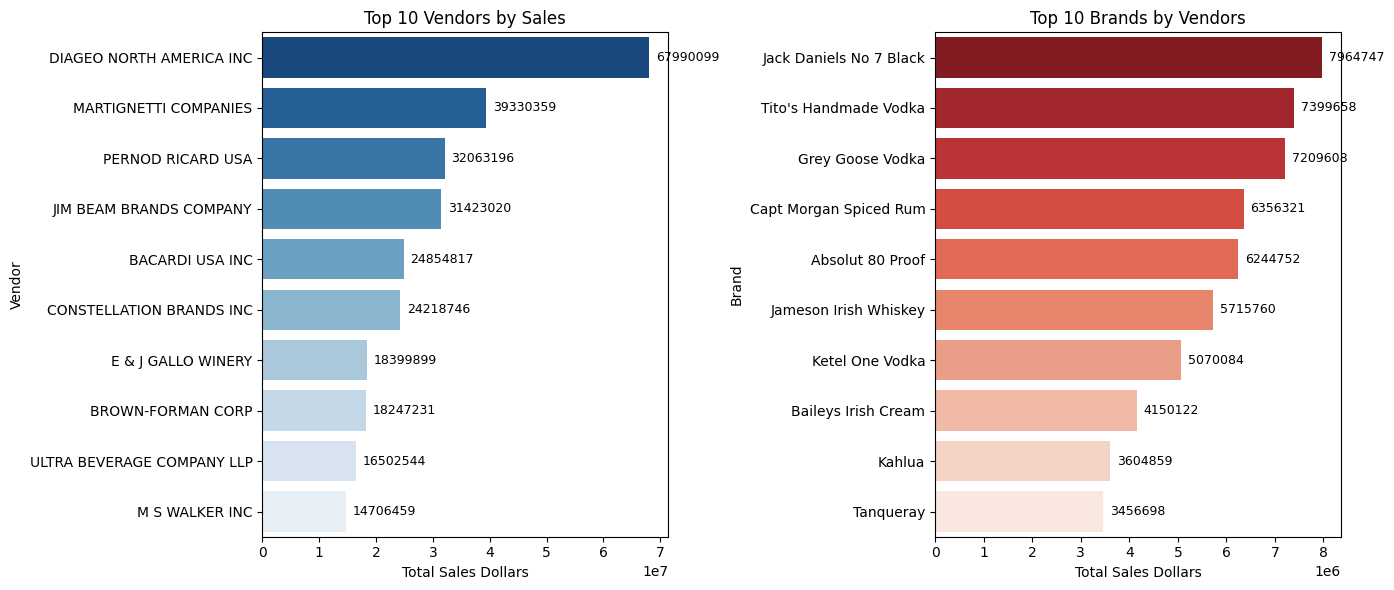

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# --- First subplot: Top vendors ---
plt.subplot(1,2,1)
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    hue=top_vendors.index,        # <-- add hue
    palette="Blues_r",
    legend=False                  # <-- suppress legend
)
plt.title("Top 10 Vendors by Sales")

# Print values on bars
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_width():.0f}",
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha="left", va="center", fontsize=9, color="black", xytext=(5,0),
        textcoords="offset points"
    )

plt.xlabel("Total Sales Dollars")
plt.ylabel("Vendor")

# --- Second subplot: Top brands ---
plt.subplot(1,2,2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    hue=top_brands.index.astype(str),   # <-- add hue
    palette="Reds_r",
    legend=False                        # <-- suppress legend
)
plt.title("Top 10 Brands by Vendors")

# Print values on bars
for p in ax2.patches:
    ax2.annotate(
        f"{p.get_width():.0f}",
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha="left", va="center", fontsize=9, color="black", xytext=(5,0),
        textcoords="offset points"
    )

plt.xlabel("Total Sales Dollars")
plt.ylabel("Brand")

plt.tight_layout()
plt.show()


ques


In [381]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum', 
    'grossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()

In [382]:
vendor_performance['purchase_contribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100)  

In [383]:
vendor_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorName              119 non-null    object 
 1   TotalPurchaseDollars    119 non-null    float64
 2   grossProfit             119 non-null    float64
 3   TotalSalesDollars       119 non-null    float64
 4   purchase_contribution%  119 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [384]:
vendor_performance = round(vendor_performance.sort_values('purchase_contribution%', ascending = False),2)

vendor_performance['TotalPurchaseDollars'] =vendor_performance['TotalPurchaseDollars'].apply(formate_dollar)  
vendor_performance['grossProfit']= vendor_performance['grossProfit'].apply(formate_dollar)  
vendor_performance['TotalSalesDollars'] = vendor_performance['TotalSalesDollars'].apply(formate_dollar)  
     
vendor_performance


,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars,purchase_contribution%
25,DIAGEO NORTH AMERICA INC,50.101M,17.891M,67.991M,16.30
57,MARTIGNETTI COMPANIES,25.501M,13.831M,39.331M,8.30
68,PERNOD RICARD USA,23.851M,8.211M,32.061M,7.76
46,JIM BEAM BRANDS COMPANY,23.491M,7.931M,31.421M,7.64
6,BACARDI USA INC,17.431M,7.421M,24.851M,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,129,199,328,0.00
107,UNCORKED,119,58,177,0.00
85,SILVER MOUNTAIN CIDERS,77,265,343,0.00
16,CAPSTONE INTERNATIONAL,55,192,247,0.00


In [385]:
# display top 10 vendor 
top_vendor = vendor_performance.head(10)
top_vendor

,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars,purchase_contribution%
25,DIAGEO NORTH AMERICA INC,50.101M,17.891M,67.991M,16.30
57,MARTIGNETTI COMPANIES,25.501M,13.831M,39.331M,8.30
68,PERNOD RICARD USA,23.851M,8.211M,32.061M,7.76
46,JIM BEAM BRANDS COMPANY,23.491M,7.931M,31.421M,7.64
6,BACARDI USA INC,17.431M,7.421M,24.851M,5.67
20,CONSTELLATION BRANDS INC,15.271M,8.951M,24.221M,4.97
11,BROWN-FORMAN CORP,13.241M,5.011M,18.251M,4.31
30,E & J GALLO WINERY,12.071M,6.331M,18.401M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.171M,5.341M,16.501M,3.63
53,M S WALKER INC,9.761M,4.941M,14.711M,3.18


In [386]:
top_vendor['purchase_contribution%'].sum()
# it means out of 119 vendor only 10 vendor contribute more than 60%
top_vendor

,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars,purchase_contribution%
25,DIAGEO NORTH AMERICA INC,50.101M,17.891M,67.991M,16.30
57,MARTIGNETTI COMPANIES,25.501M,13.831M,39.331M,8.30
68,PERNOD RICARD USA,23.851M,8.211M,32.061M,7.76
46,JIM BEAM BRANDS COMPANY,23.491M,7.931M,31.421M,7.64
6,BACARDI USA INC,17.431M,7.421M,24.851M,5.67
20,CONSTELLATION BRANDS INC,15.271M,8.951M,24.221M,4.97
11,BROWN-FORMAN CORP,13.241M,5.011M,18.251M,4.31
30,E & J GALLO WINERY,12.071M,6.331M,18.401M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.171M,5.341M,16.501M,3.63
53,M S WALKER INC,9.761M,4.941M,14.711M,3.18


In [387]:
top_vendor["cumulative_Contribution%"] = top_vendor["purchase_contribution%"].cumsum()
top_vendor

C:\Users\tanis\AppData\Local\Temp\ipykernel_8336\2664313397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendor["cumulative_Contribution%"] = top_vendor["purchase_contribution%"].cumsum()


,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars,purchase_contribution%,cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.101M,17.891M,67.991M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.501M,13.831M,39.331M,8.30,24.60
68,PERNOD RICARD USA,23.851M,8.211M,32.061M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.491M,7.931M,31.421M,7.64,40.00
6,BACARDI USA INC,17.431M,7.421M,24.851M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.271M,8.951M,24.221M,4.97,50.64
11,BROWN-FORMAN CORP,13.241M,5.011M,18.251M,4.31,54.95
30,E & J GALLO WINERY,12.071M,6.331M,18.401M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.171M,5.341M,16.501M,3.63,62.51
53,M S WALKER INC,9.761M,4.941M,14.711M,3.18,65.69


In [390]:
# Bar plot for individual contributions
sns.barplot(
    x= top_vendor["VendorName"], y= ["purchase_contribution%"],
    ax=ax1, color="skyblue"
)

for i, value in enumerate(top_vendor['purchase_contribution%']):
    ax1.text(i, value-1 , str(value)+ '%', ha='center', fontsize=10, color='white')

ax1.set_ylabel("Purchase Contribution (%)")
ax1.set_xlabel("Vendor")
ax1.tick_params(axis="x", rotation=75)

# Line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendor["VendorName"],
    top_vendor["cumulative_Contribution%"],
    color="red", marker="o", linewidth=2
)
ax2.set_ylabel("Cumulative Contribution (%)")
ax1.set_Xticklabels(top_vendor["VendorName"], rotation=90)

# Add horizontal line at 80% (Pareto threshold)
ax2.axhline(80, color="green", linestyle="--", linewidth=1)

plt.title("Pareto Chart of Vendor Purchase Contribution")
plt.tight_layout()
plt.show()


ValueError: array length 1 does not match index length 10

C:\Users\tanis\AppData\Local\Temp\ipykernel_8336\2391548452.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendor["VendorName"], rotation=90)


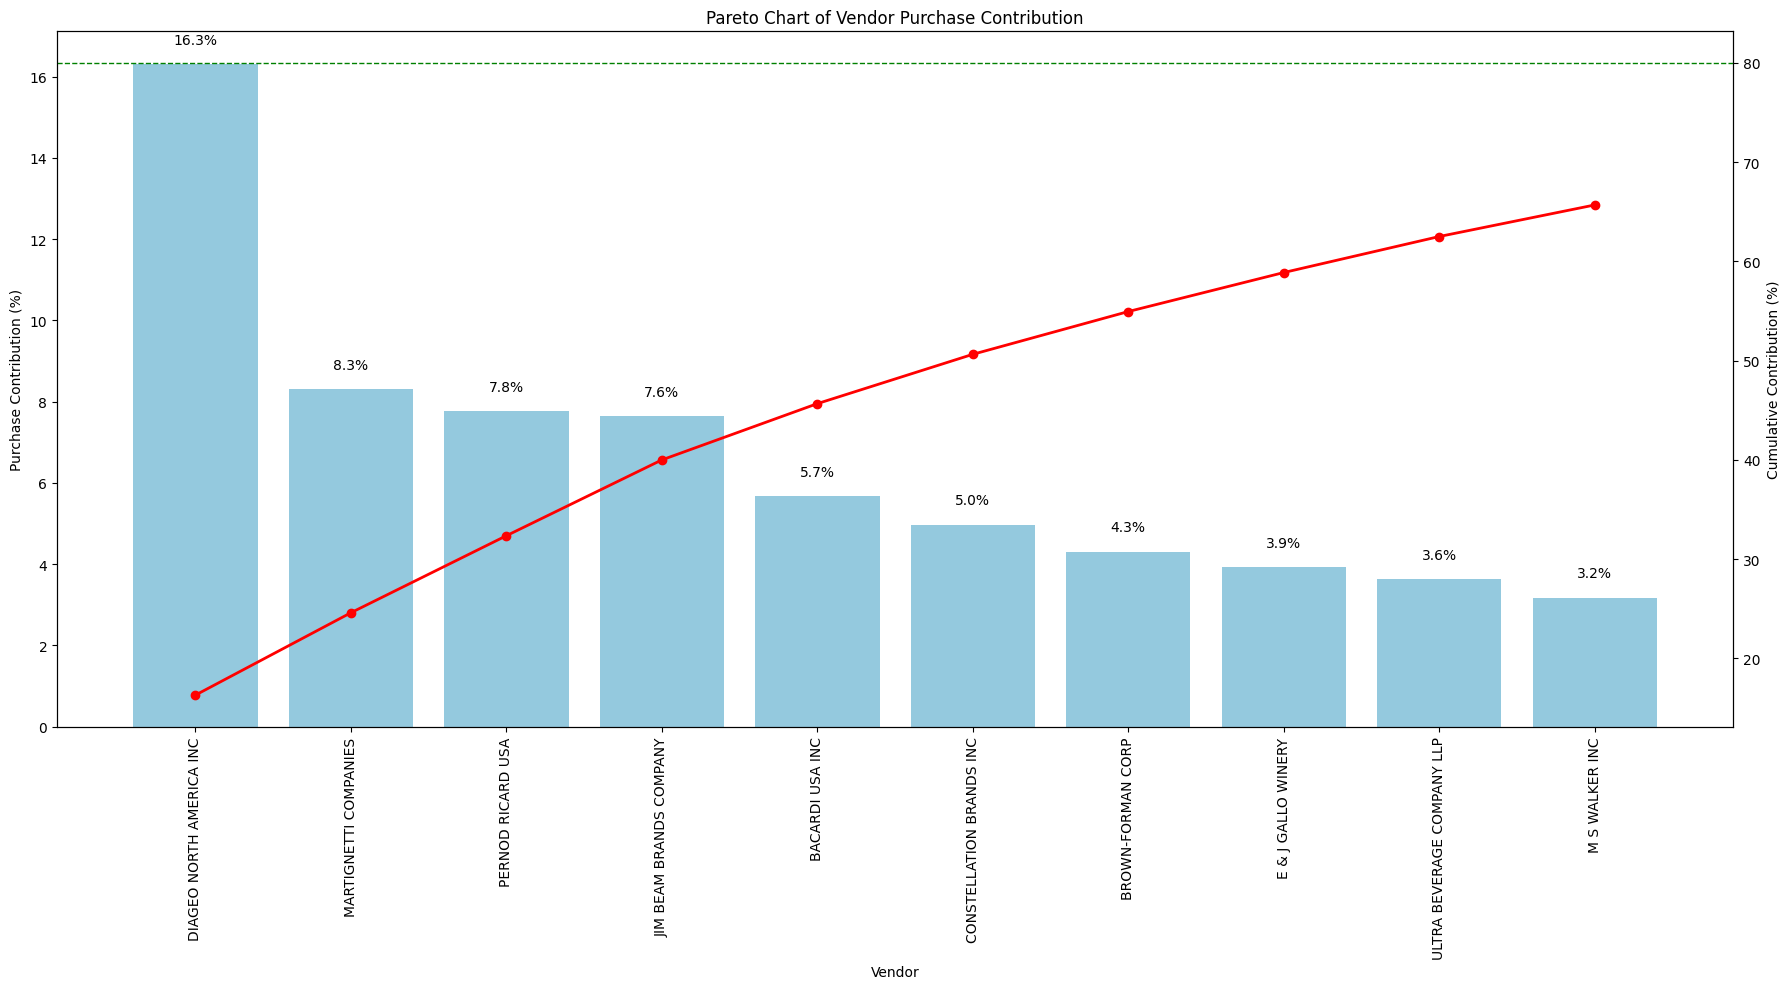

In [392]:
fig, ax1 = plt.subplots(figsize=(18,10))

# Bar plot for individual contributions
sns.barplot(
    x=top_vendor["VendorName"], 
    y=top_vendor["purchase_contribution%"],
    ax=ax1, color="skyblue"
)

# Annotate bars
for i, value in enumerate(top_vendor['purchase_contribution%']):
    ax1.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10, color='black')

ax1.set_ylabel("Purchase Contribution (%)")
ax1.set_xlabel("Vendor")
ax1.tick_params(axis="x", rotation=75)

# Line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendor["VendorName"],
    top_vendor["cumulative_Contribution%"],
    color="red", marker="o", linewidth=2
)
ax2.set_ylabel("Cumulative Contribution (%)")

# Fix xticklabels
ax1.set_xticklabels(top_vendor["VendorName"], rotation=90)

# Add horizontal line at 80% (Pareto threshold)
ax2.axhline(80, color="green", linestyle="--", linewidth=1)

plt.title("Pareto Chart of Vendor Purchase Contribution")
plt.tight_layout()
plt.show()


In [398]:
print(f"total purchase contribution of top 10 vendor is {round(top_vendor['purchase_contribution%'].sum(),2)} %")

total purchase contribution of top 10 vendor is 65.69 %


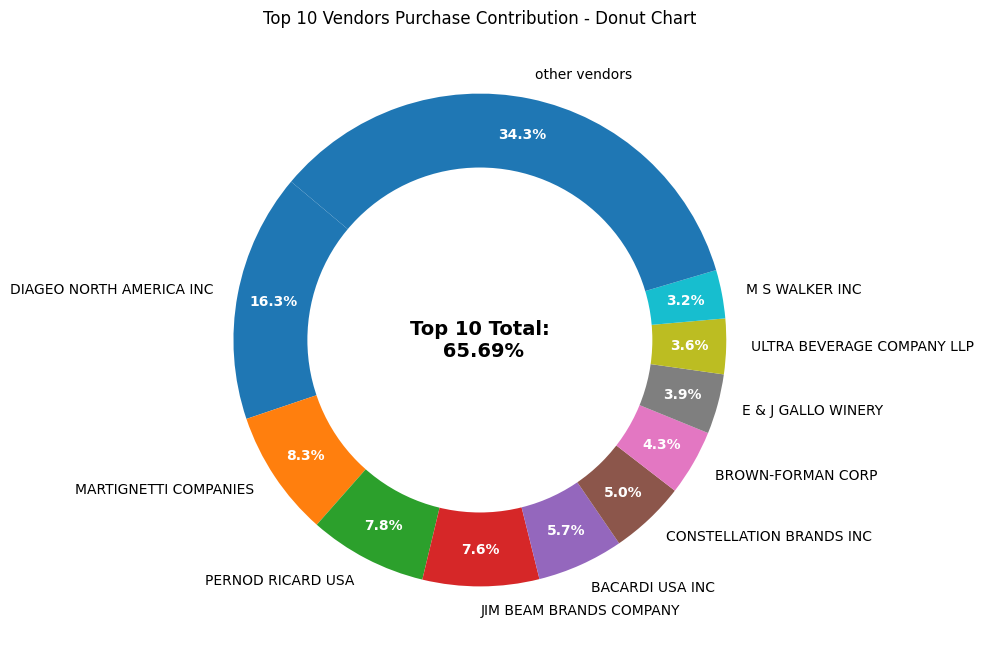

In [402]:
vendors = list(top_vendor['VendorName'].values)
purchase_contribution = list(top_vendor['purchase_contribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contibution = 100- total_contribution

#append other vendor category
vendors.append("other vendors")

purchase_contribution.append(remaining_contibution)

import matplotlib.pyplot as plt

# Data: top 10 vendors purchase contribution
labels = top_vendor["VendorName"]
sizes = top_vendor["purchase_contribution%"]

# Create pie chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance =0.85,
    wedgeprops=dict(width=0.4)  # width < 1.0 makes it a donut
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0,0, f"Top 10 Total:\n {total_contribution:.2f}%", fontsize =14, fontweight='bold', ha='center', va='center')
# Style
plt.setp(autotexts, size=10, weight="bold", color="white")
ax.set_title("Top 10 Vendors Purchase Contribution - Donut Chart")

plt.show()


In [404]:
df['unit_purchase_price'] = df['TotalPurchaseDollars']/df['TotalPurchaseQty']

In [405]:
df

,Unnamed: 0,VendorNumber,VendorName,Brand,Description,PurchasePrice,TotalPurchaseQty,TotalPurchaseDollars,Volume,ActualPrice,FreightCost,TotalSalesDollars,TotalSalesPrice,TotalSalesQty,TotalExciseTax,grossProfit,ProfitMargin,StockTurnOver,SalesPurhaseRatio,unit_purchase_price
0,0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,145080,3811251.60,1750.0,36.99,68601.68,5101919.51,672819.31,142049.0,260999.20,1290667.91,0.252977,0.979108,1.338647,26.27
1,1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,164038,3804041.22,1750.0,28.99,144929.24,4819073.49,561512.37,160247.0,294438.66,1015032.27,0.210628,0.976890,1.266830,23.19
2,2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,187407,3418303.68,1750.0,24.99,123780.22,4538120.60,461140.15,187140.0,343854.07,1119816.92,0.246758,0.998575,1.327594,18.24
3,3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,201682,3261197.94,1750.0,22.99,257032.07,4475972.88,420050.01,200412.0,368242.80,1214774.94,0.271399,0.993703,1.372493,16.17
4,4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,138109,3023206.01,1750.0,29.99,257032.07,4223107.62,545778.28,135838.0,249587.83,1199901.61,0.284128,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,10509,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,1,3.99,750.0,5.79,27100.41,5.79,5.79,1.0,0.11,1.80,0.310881,1.000000,1.451128,3.99
10510,10510,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,1,4.14,750.0,6.29,9.46,5.79,5.79,1.0,0.11,1.65,0.284974,1.000000,1.398551,4.14
10511,10511,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,1,3.57,1500.0,5.29,15919.70,5.29,5.29,1.0,0.22,1.72,0.325142,1.000000,1.481793,3.57
10512,10512,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,1,3.37,750.0,4.99,144929.24,4.99,4.99,1.0,0.11,1.62,0.324649,1.000000,1.480712,3.37


In [406]:
df["order_size"] = pd.qcut(df['TotalPurchaseQty'], q=3, labels =["small", "medium", "large"])

In [408]:
df[['order_size' ,'TotalPurchaseQty']]

,order_size,TotalPurchaseQty
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
10509,small,1
10510,small,1
10511,small,1
10512,small,1


In [410]:
df.groupby('order_size')[['unit_purchase_price']].mean()

C:\Users\tanis\AppData\Local\Temp\ipykernel_8336\1641870612.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('order_size')[['unit_purchase_price']].mean()


,unit_purchase_price
order_size,
small,39.068186
medium,15.486414
large,10.777625


C:\Users\tanis\AppData\Local\Temp\ipykernel_8336\1898457967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="order_size", y="unit_purchase_price", data=df, palette="Set2")


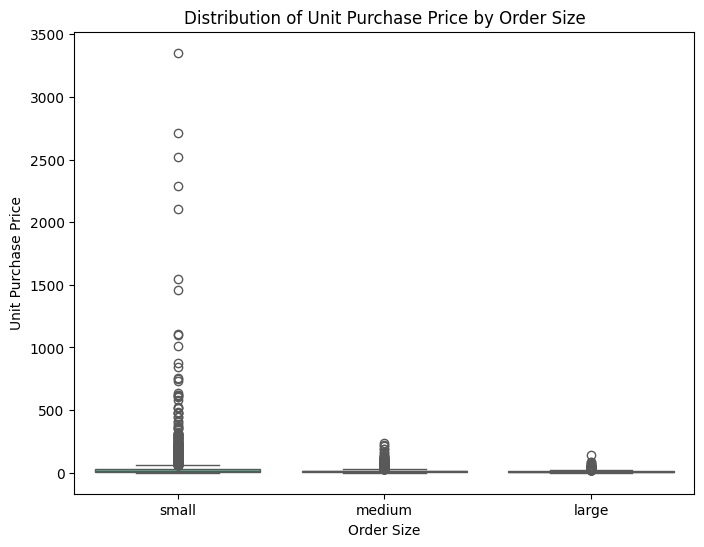

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of unit purchase price by order size
plt.figure(figsize=(8,6))
sns.boxplot(x="order_size", y="unit_purchase_price", data=df, palette="Set2")

plt.title("Distribution of Unit Purchase Price by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.show()


In [ ]:
markdown

In [ ]:
ques

In [416]:
df[df['StockTurnOver']<1].groupby("VendorName")[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending =True, ).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [ ]:
ques

In [419]:
df["UnsoldInventoryValue"] = (df['TotalPurchaseQty'] - df['TotalSalesQty']) *df['PurchasePrice']
print('Total unsold capital :', formate_dollar(df["UnsoldInventoryValue"].sum()))

Total unsold capital : 2.711M


In [421]:
# Aggregate capital locked per vendor
inventory_value_per_vendor = (
    df.groupby("VendorName")["UnsoldInventoryValue"]
      .sum()
      .reset_index()
)

# Sort vendors with highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by="UnsoldInventoryValue", ascending=False
)

# Apply formatting to the correct column name
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollar)

# Show top 10 vendors
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


In [479]:
df['ProfitMargin']

0        25.297693
1        21.062810
2        24.675786
3        27.139908
4        28.412764
           ...    
10509    31.088083
10510    28.497409
10511    32.514178
10512    32.464930
10513    25.252525
Name: ProfitMargin, Length: 8564, dtype: float64

In [495]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [496]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] >= low_threshold]['ProfitMargin'].dropna()

In [497]:
low_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
7197    75.288405
7198    91.315896
7199    90.773374
7200    31.377906
7201    24.260216
Name: ProfitMargin, Length: 6423, dtype: float64

In [483]:
def confidence_interval(data, confidence =0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence) /2,df=len(data)-1)
    margin_of_error = t_critical *std_err
    return mean_val, mean_val - margin_of_error , mean_val + margin_of_error


top vendors 95% CI : (30.74, 31.61), Mean : 31.18
low vendors 95% CI : (37.29, 38.26), Mean : 37.77


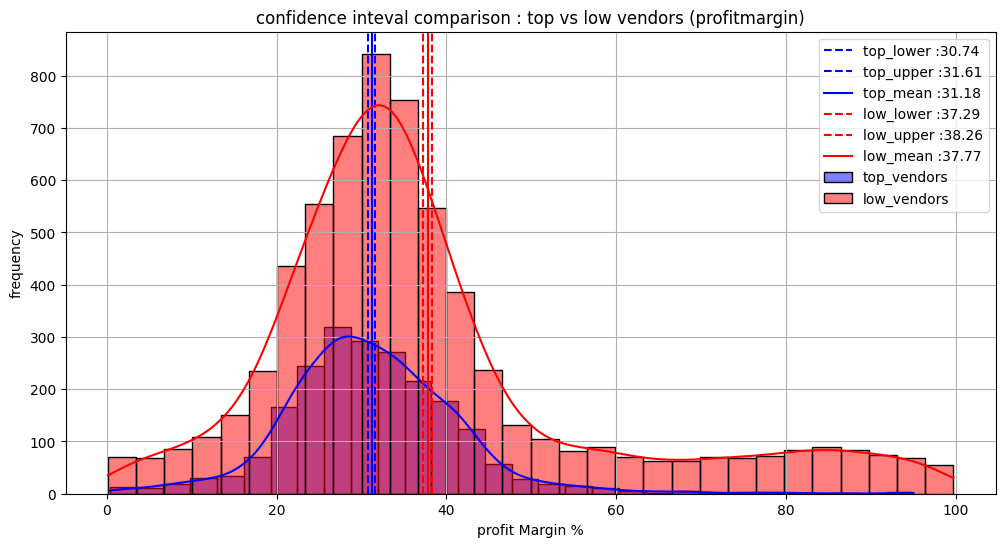

In [492]:
top_mean , top_lower, top_upper = confidence_interval(top_vendors)
low_mean , low_lower, low_upper = confidence_interval(low_vendors)


print(f"top vendors 95% CI : ({top_lower :.2f}, {top_upper :.2f}), Mean : {top_mean:.2f}")
print(f"low vendors 95% CI : ({low_lower :.2f}, {low_upper :.2f}), Mean : {low_mean:.2f}")


plt.figure(figsize=(12,6))

#top vendors plot
sns.histplot(top_vendors, kde = True, color="blue", bins=30, alpha=0.5, label="top_vendors")
plt.axvline(top_lower , color='blue' , linestyle = '--' , label = f"top_lower :{top_lower:.2f}")
plt.axvline(top_upper , color='blue' , linestyle = '--' , label = f"top_upper :{top_upper:.2f}")
plt.axvline(top_mean, color='blue' , linestyle = '-' , label = f"top_mean :{top_mean:.2f}")

#low vendor plot
            
sns.histplot(low_vendors, kde = True, color="red", bins=30, alpha=0.5, label="low_vendors")
plt.axvline(low_lower , color='red' , linestyle = '--' , label = f"low_lower :{low_lower:.2f}")
plt.axvline(low_upper , color='red' , linestyle = '--' , label = f"low_upper :{low_upper:.2f}")
plt.axvline(low_mean, color='red' , linestyle = '-' , label = f"low_mean :{low_mean:.2f}")

plt.title("confidence inteval comparison : top vs low vendors (profitmargin)")
plt.xlabel("profit Margin %")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()

In [498]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [502]:
from scipy.stats import ttest_ind

# Define thresholds (example: quartiles)
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

# Split vendors
top_vendor = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendor = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform Welch’s t-test (unequal variances)
t_stat, p_value = ttest_ind(top_vendor, low_vendor, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H\u2080: There is a significant difference in profit margin between top and low vendors.")
else:
    print("Fail to reject H\u2080: No significant difference in profit margin.")


T-Statistic: -17.6695, p-value: 0.0000
Reject H₀: There is a significant difference in profit margin between top and low vendors.
